# Multiple regression with Seaborn

In [44]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None
df=pd.read_csv("mobile_prices.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


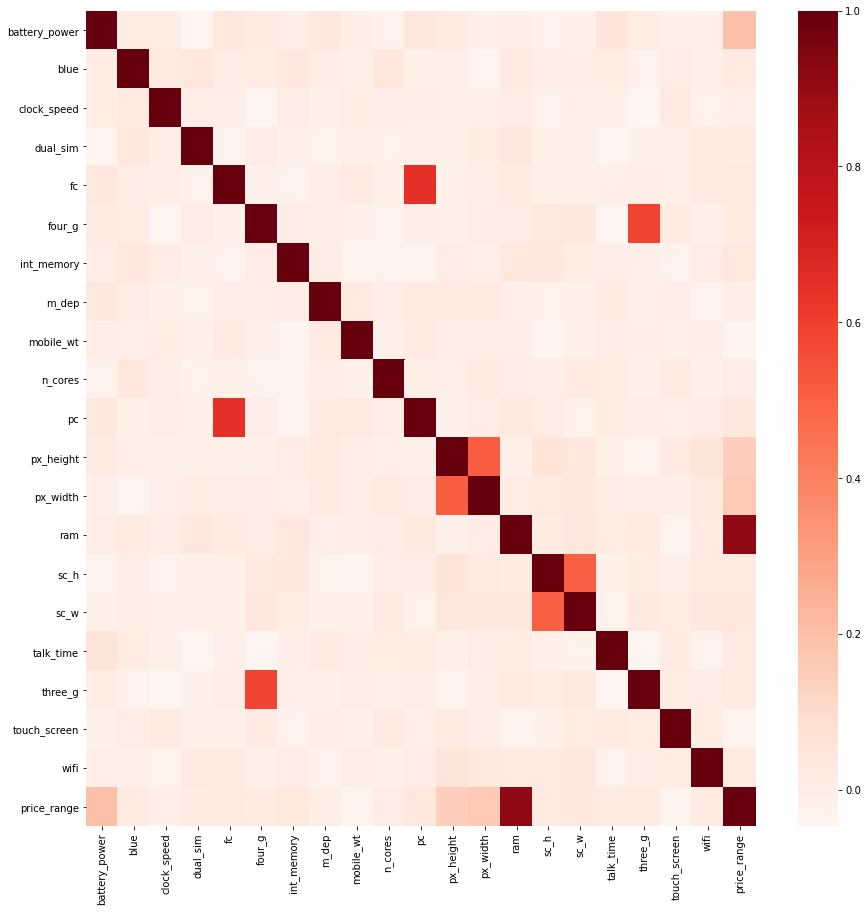

In [45]:
df2=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df2, cmap='Reds')

#### From looking at the heatmap, we already know that the greatest correlation is between price range and ram. We can see also some correlation between price range and battery power, pixel resolution height and pixel resolution width.
#### We want to know the real correlation between those features and the price range of the mobile phones.

In [46]:
sc=StandardScaler()
x=df[['ram','battery_power', 'px_height', 'px_width']]
y=df[['price_range']]

x[['ram','battery_power', 'px_height', 'px_width']]=sc.fit_transform(x[['ram','battery_power', 'px_height', 'px_width']].values)

estimated=sm.OLS(y, x).fit()
estimated.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            price_range   R-squared (uncentered):                   0.328
Model:                            OLS   Adj. R-squared (uncentered):              0.326
Method:                 Least Squares   F-statistic:                              243.1
Date:                Sat, 31 Oct 2020   Prob (F-statistic):                   3.26e-170
Time:                        12:05:01   Log-Likelihood:                         -3693.8
No. Observations:                2000   AIC:                                      7396.
Df Residuals:                    1996   BIC:                                      7418.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ram               1.0274      0.034     29.910      0.000       0.960       1.095
battery_power     0.2243      0.034      6.529      0.000       0.157       0.292
px_height         0.1224      0.040      3.064      0.002       0.044       0.201
px_width          0.1205      0.040      3.017      0.003       0.042       0.199
==============================================================================
Omnibus:                      111.127   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.456
Skew:                           0.058   Prob(JB):                     3.66e-10
Kurtosis:                       2.287   Cond. No.                         1.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### As we expected, the amount od ram is the most important feature (it has the greatest coefficient - 1.0249). The pixel resolution height and the pixel resolution width have very similar coefficients. We can consider that their effect on the price is the same (are features of the display resolution).

In [47]:
(df.ram).groupby(df.price_range).mean()

price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64

#### In 0 price class (low cost) the mean of the ram is 785.314 megabytes and for the 3 price class, so for the most expensive mobiles the mean of the ram is 3449.232 megabytes.
#### We can predict the price class of the given mobile, by specifying the features we tested.


In [65]:
scaled = sc.transform([[2000, 4000, 1200 ,1700]])
print(scaled)
predicted = estimated.predict(scaled)
print(predicted)

[[-0.11453895  6.28597562  1.25068674  1.037939  ]]
[1.57034019]
